# Analysis of Algorithms

[Click here to run this chapter on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/notebooks/analysis.ipynb)

**Analysis of algorithms** is a branch of computer science that studies
the performance of algorithms, especially their run time and space
requirements. See <http://en.wikipedia.org/wiki/Analysis_of_algorithms>.

The practical goal of algorithm analysis is to predict the performance
of different algorithms in order to guide design decisions.

During the 2008 United States Presidential Campaign, candidate Barack
Obama was asked to perform an impromptu analysis when he visited Google.
Chief executive Eric Schmidt jokingly asked him for "the most efficient
way to sort a million 32-bit integers." Obama had apparently been tipped
off, because he quickly replied, "I think the bubble sort would be the
wrong way to go." See <http://www.youtube.com/watch?v=k4RRi_ntQc8>.

This is true: bubble sort is conceptually simple but slow for large datasets. The answer Schmidt was probably looking for is "radix sort"
(<http://en.wikipedia.org/wiki/Radix_sort>).

But if you get a question like this in an interview, I think a
better answer is, "The fastest way to sort a million integers is to
use whatever sort function is provided by the language I'm using.
Its performance is good enough for the vast majority of
applications, but if it turned out that my application was too slow,
I would use a profiler to see where the time was being spent. If it
looked like a faster sort algorithm would have a significant effect
on performance, then I would look around for a good implementation
of radix sort."

The goal of algorithm analysis is to make meaningful comparisons between algorithms, but there are some problems:

-   The relative performance of the algorithms might depend on
    characteristics of the hardware, so one algorithm might be faster on
    Machine A, another on Machine B. The usual solution to this
    problem is to specify a **machine model** and analyze the number of
    steps, or operations, an algorithm requires under a given model.

-   Relative performance might depend on the details of the dataset. For
    example, some sorting algorithms run faster if the data are already
    partially sorted; other algorithms run slower in this case. A common
    way to avoid this problem is to analyze the **worst case** scenario.
    It is sometimes useful to analyze average case performance, but
    that's usually harder, and it might not be obvious what set of cases
    to average over.

-   Relative performance also depends on the size of the problem. A
    sorting algorithm that is fast for small lists might be slow for
    long lists. The usual solution to this problem is to express run
    time (or number of operations) as a function of problem size, and
    group functions into categories depending on how quickly they grow
    as problem size increases.

The good thing about this kind of comparison is that it lends itself to
simple classification of algorithms. For example, if I know that the run
time of Algorithm A tends to be proportional to the size of the input,
$n$, and Algorithm B tends to be proportional to $n^2$, then I expect A
to be faster than B, at least for large values of $n$.

This kind of analysis comes with some caveats, but we'll get to that later.

## Order of growth

Suppose you have analyzed two algorithms and expressed their run times in terms of the size of the input: Algorithm A takes $100n+1$ steps to solve a problem with size $n$; Algorithm B takes $n^2 + n + 1$ steps.

The following table shows the run time of these algorithms for different problem sizes:

In [8]:
import numpy as np
import pandas as pd

n = np.array([10, 100, 1000, 10000])
table = pd.DataFrame(index=n)
table['Algorithm A'] = 100 * n + 1
table['Algorithm B'] = n**2 + n + 1
table['Ratio (B/A)'] = table['Algorithm B'] / table['Algorithm A']
table

,Algorithm A,Algorithm B,Ratio (B/A)
10,1001,111,0.110889
100,10001,10101,1.009999
1000,100001,1001001,10.009910
10000,1000001,100010001,100.009901


At $n=10$, Algorithm A looks pretty bad; it takes almost 10 times longer
than Algorithm B. 
But for $n=100$ they are about the same, and for larger values A is much better.

The fundamental reason is that for large values of $n$, any function
that contains an $n^2$ term will grow faster than a function whose
leading term is $n$. The **leading term** is the term with the highest
exponent.

For Algorithm A, the leading term has a large coefficient, 100, which is
why B does better than A for small $n$. But regardless of the
coefficients, there will always be some value of $n$ where
$a n^2 > b n$, for any values of $a$ and $b$.

The same argument applies to the non-leading terms. Suppose the run time
of Algorithm C is $n+1000000$; it would still be better than Algorithm
B for sufficiently large $n$.

In [9]:
import numpy as np
import pandas as pd

n = np.array([10, 100, 1000, 10000])
table = pd.DataFrame(index=n)
table['Algorithm C'] = n + 1000000
table['Algorithm B'] = n**2 + n + 1
table['Ratio (C/B)'] = table['Algorithm B'] / table['Algorithm C']
table

,Algorithm C,Algorithm B,Ratio (C/B)
10,1000010,111,0.000111
100,1000100,10101,0.010100
1000,1001000,1001001,1.000001
10000,1010000,100010001,99.019803


In general, we expect an algorithm with a smaller leading term to be a
better algorithm for large problems, but for smaller problems, there may
be a **crossover point** where another algorithm is better. 

The following figure shows the run times (in arbitrary units) for the three algorithms over a range of problems sizes. For small problem sizes, Algorithm B is the fastest, but for large problems sizes, it is the worst.
In the figure, we can see where the crossover points are.

Matplotlib is building the font cache; this may take a moment.


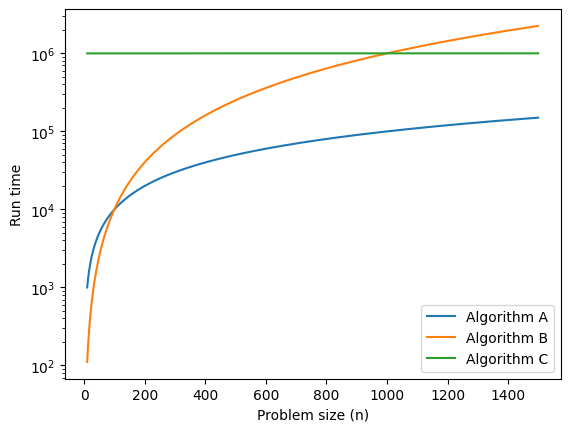

In [10]:
import matplotlib.pyplot as plt

ns = np.arange(10, 1500)
ys = 100 * ns + 1
plt.plot(ns, ys, label='Algorithm A')

ys = ns**2 + ns + 1
plt.plot(ns, ys, label='Algorithm B')

ys = ns + 1_000_000
plt.plot(ns, ys, label='Algorithm C')

plt.yscale('log')
plt.xlabel('Problem size (n)')
plt.ylabel('Run time')
plt.legend();

The location of these crossover points depends on the details of the algorithms, the
inputs, and the hardware, so it is usually ignored for purposes of
algorithmic analysis. But that doesn't mean you can forget about it.

## Big O notation

If two algorithms have the same leading order term, it is hard to say
which is better; again, the answer depends on the details. So for
algorithmic analysis, functions with the same leading term are
considered equivalent, even if they have different coefficients.

An **order of growth** is a set of functions whose growth behavior is
considered equivalent. For example, $2n$, $100n$ and $n+1$ belong to the
same order of growth, which is written $O(n)$ in **Big-O notation** and
often called **linear** because every function in the set grows linearly
with $n$.

All functions with the leading term $n^2$ belong to $O(n^2)$; they are
called **quadratic**.

The following table shows some of the orders of growth that appear most
commonly in algorithmic analysis, in increasing order of badness.
 
| Order of growth | Name                      |
|-----------------|---------------------------|
| $O(1)$          | constant                  |
| $O(\log_b n)$   | logarithmic (for any $b$) |
| $O(n)$          | linear                    |
| $O(n \log_b n)$ | linearithmic              |
| $O(n^2)$        | quadratic                 |
| $O(n^3)$        | cubic                     |
| $O(c^n)$        | exponential (for any $c$) |
  

For the logarithmic terms, the base of the logarithm doesn't matter;
changing bases is the equivalent of multiplying by a constant, which
doesn't change the order of growth. Similarly, all exponential functions
belong to the same order of growth regardless of the base of the
exponent. Exponential functions grow very quickly, so exponential
algorithms are only useful for small problems.


### Exercise

Read the Wikipedia page on Big-O notation at
<http://en.wikipedia.org/wiki/Big_O_notation> and answer the following
questions:

1.  What is the order of growth of $n^3 + n^2$? What about $1000000 n^3 + n^2$? What about $n^3 + 1000000 n^2$?

        The order is Cubic because the leading term, $n^3$ is cubic.

2.  What is the order of growth of $(n^2 + n) \cdot (n + 1)$? Before you start multiplying, remember that you only need the leading term.

        The order is cubic. When multiplied out, the leading term will be $n^3$.

3.  If $f$ is in $O(g)$, for some unspecified function $g$, what can we say about $af+b$, where $a$ and $b$ are constants?

        $af+b$ will still be in $O(g)$. Scaling the function and adding a constant will not change the leading term.

4.  If $f_1$ and $f_2$ are in $O(g)$, what can we say about $f_1 + f_2$?

        $f_1 + f_2$ will still be in $O(g)$.

5.  If $f_1$ is in $O(g)$ and $f_2$ is in $O(h)$, what can we say about $f_1 + f_2$?

        $f_1 + f_2$ will be in whichever fuction has a higher order of growth.

6.  If $f_1$ is in $O(g)$ and $f_2$ is in $O(h)$, what can we say about $f_1 \cdot f_2$?

        It will belong to $O(gh)$.

Programmers who care about performance often find this kind of analysis
hard to swallow. They have a point: sometimes the coefficients and the
non-leading terms make a real difference. Sometimes the details of the
hardware, the programming language, and the characteristics of the input
make a big difference. And for small problems, order of growth is
irrelevant.

But if you keep those caveats in mind, algorithmic analysis is a useful
tool. At least for large problems, the "better" algorithm is usually
better, and sometimes it is *much* better. The difference between two
algorithms with the same order of growth is usually a constant factor,
but the difference between a good algorithm and a bad algorithm is
unbounded!

## Example: Adding the elements of a list

In Python, most arithmetic operations are constant time; multiplication usually takes longer than addition and subtraction, and division takes even longer, but these run times don't depend on the magnitude of the operands. Very large integers are an exception; in that case the run time increases with the number of digits.

A `for` loop that iterates a list is linear, as long as all of the operations in the body of the loop are constant time. For example, adding up the elements of a list is linear:

In [11]:
def compute_sum(t):
    total = 0
    for x in t:
        total += x
    return total

In [12]:
t = range(10)
compute_sum(t)

45

The built-in function `sum` is also linear because it does the same thing, but it tends to be faster because it is a more efficient implementation; in the language of algorithmic analysis, it has a smaller leading coefficient.

In [13]:
%timeit compute_sum(t)

1.16 µs ± 502 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [14]:
%timeit sum(t)

354 ns ± 26.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Example: Sorting

Python provides a list method, `sort`, that modifies a list in place, and a function, `sorted` that makes a new list.

Read the Wikipedia page on sorting algorithms at
<http://en.wikipedia.org/wiki/Sorting_algorithm> and answer the
following questions:

1.  What is a "comparison sort?" What is the best worst-case order of growth for a comparison sort? What is the best worst-case order of growth for any sort algorithm?

        A comparison sort reads each element through one comparison operation. The best case is $n$ and the worst case is $n^2$.

2.  What is the order of growth of bubble sort, and why does Barack Obama think it is "the wrong way to go?"

        $n^2$. Bubble sorts are only used on small data sets because the ineffecieny becomes too large when computing lots of data.

3.  What is the order of growth of radix sort? What preconditions do we need to use it?

        $O(nk)$ where n is the amount of numbers and k is the number of digits. We need to know both n and k before using it.

4.  What is a stable sort and why might it matter in practice?

        A stable sort does not change the order of input and output in specific cicrumstances. This is usefull when you want to perform multiple sorts.

5.  What is the worst sorting algorithm (that has a name)?

        Bogosort is the worst sorting algorithm. It could sort forever.

6.  What sort algorithm does the C library use? What sort algorithm does Python use? Are these algorithms stable? You might have to Google around to find these answers.

        C uses bubble sort, selection sort, quick sort, merge sort, heap sort and insertion sort. Python uses Tim sort, a combination of insertion sort and merge sort. Tim sort is stable and so are the C algorithms.

7.  Many of the non-comparison sorts are linear, so why does Python use an $O(n \log n)$ comparison sort?

        It is able to handle much more complex data sets.

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)